<ipython-input-1-1d64ed55c59a>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})
<ipython-input-1-1d64ed55c59a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diagnosis'], palette='coolwarm')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             569 non-null    float64
 1   texture            569 non-null    float64
 2   perimeter          569 non-null    float64
 3   area               569 non-null    float64
 4   smoothness         569 non-null    float64
 5   compactness        569 non-null    float64
 6   concavity          569 non-null    float64
 7   concave_points     569 non-null    float64
 8   symmetry           569 non-null    float64
 9   fractal_dimension  569 non-null    float64
 10  diagnosis          569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


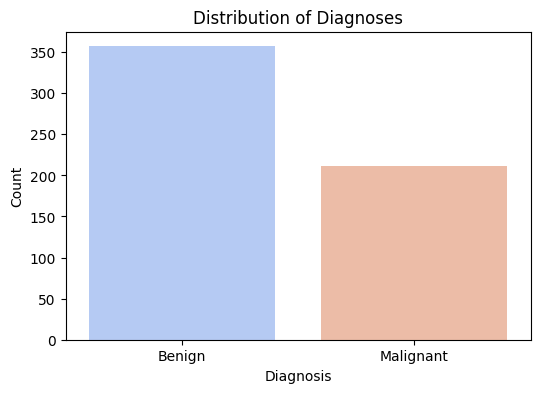

diagnosis            1.000000
concave_points       0.776614
perimeter            0.742636
radius               0.730029
area                 0.708984
concavity            0.696360
compactness          0.596534
texture              0.415185
smoothness           0.358560
symmetry             0.330499
fractal_dimension   -0.012838
Name: diagnosis, dtype: float64


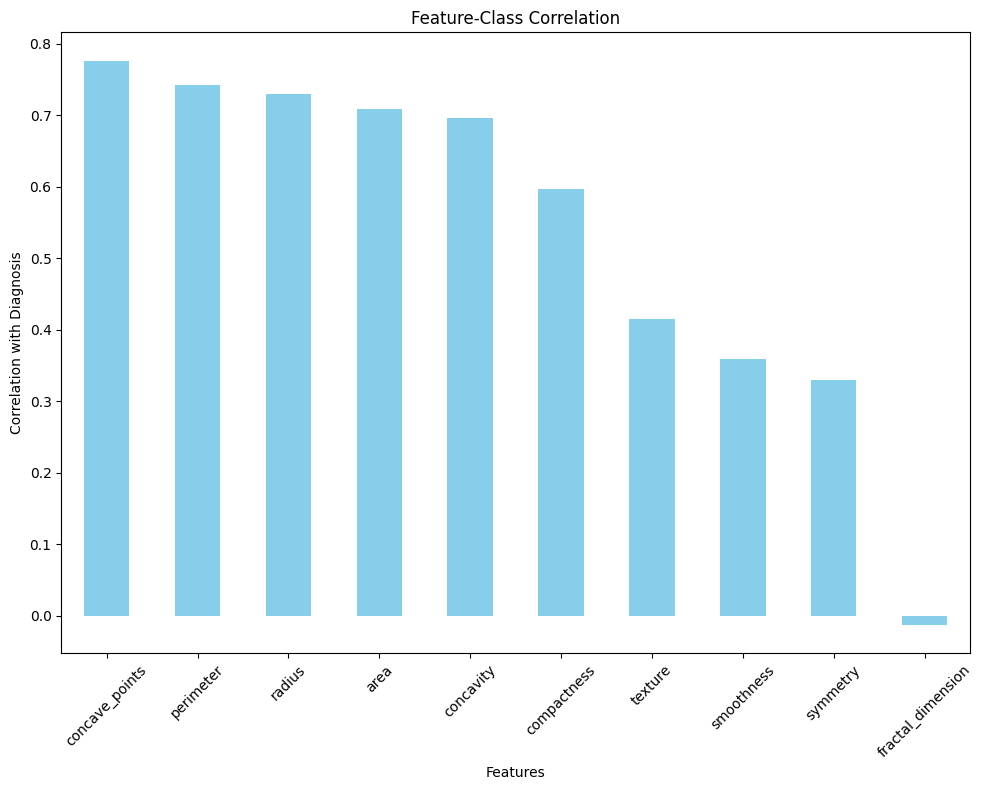

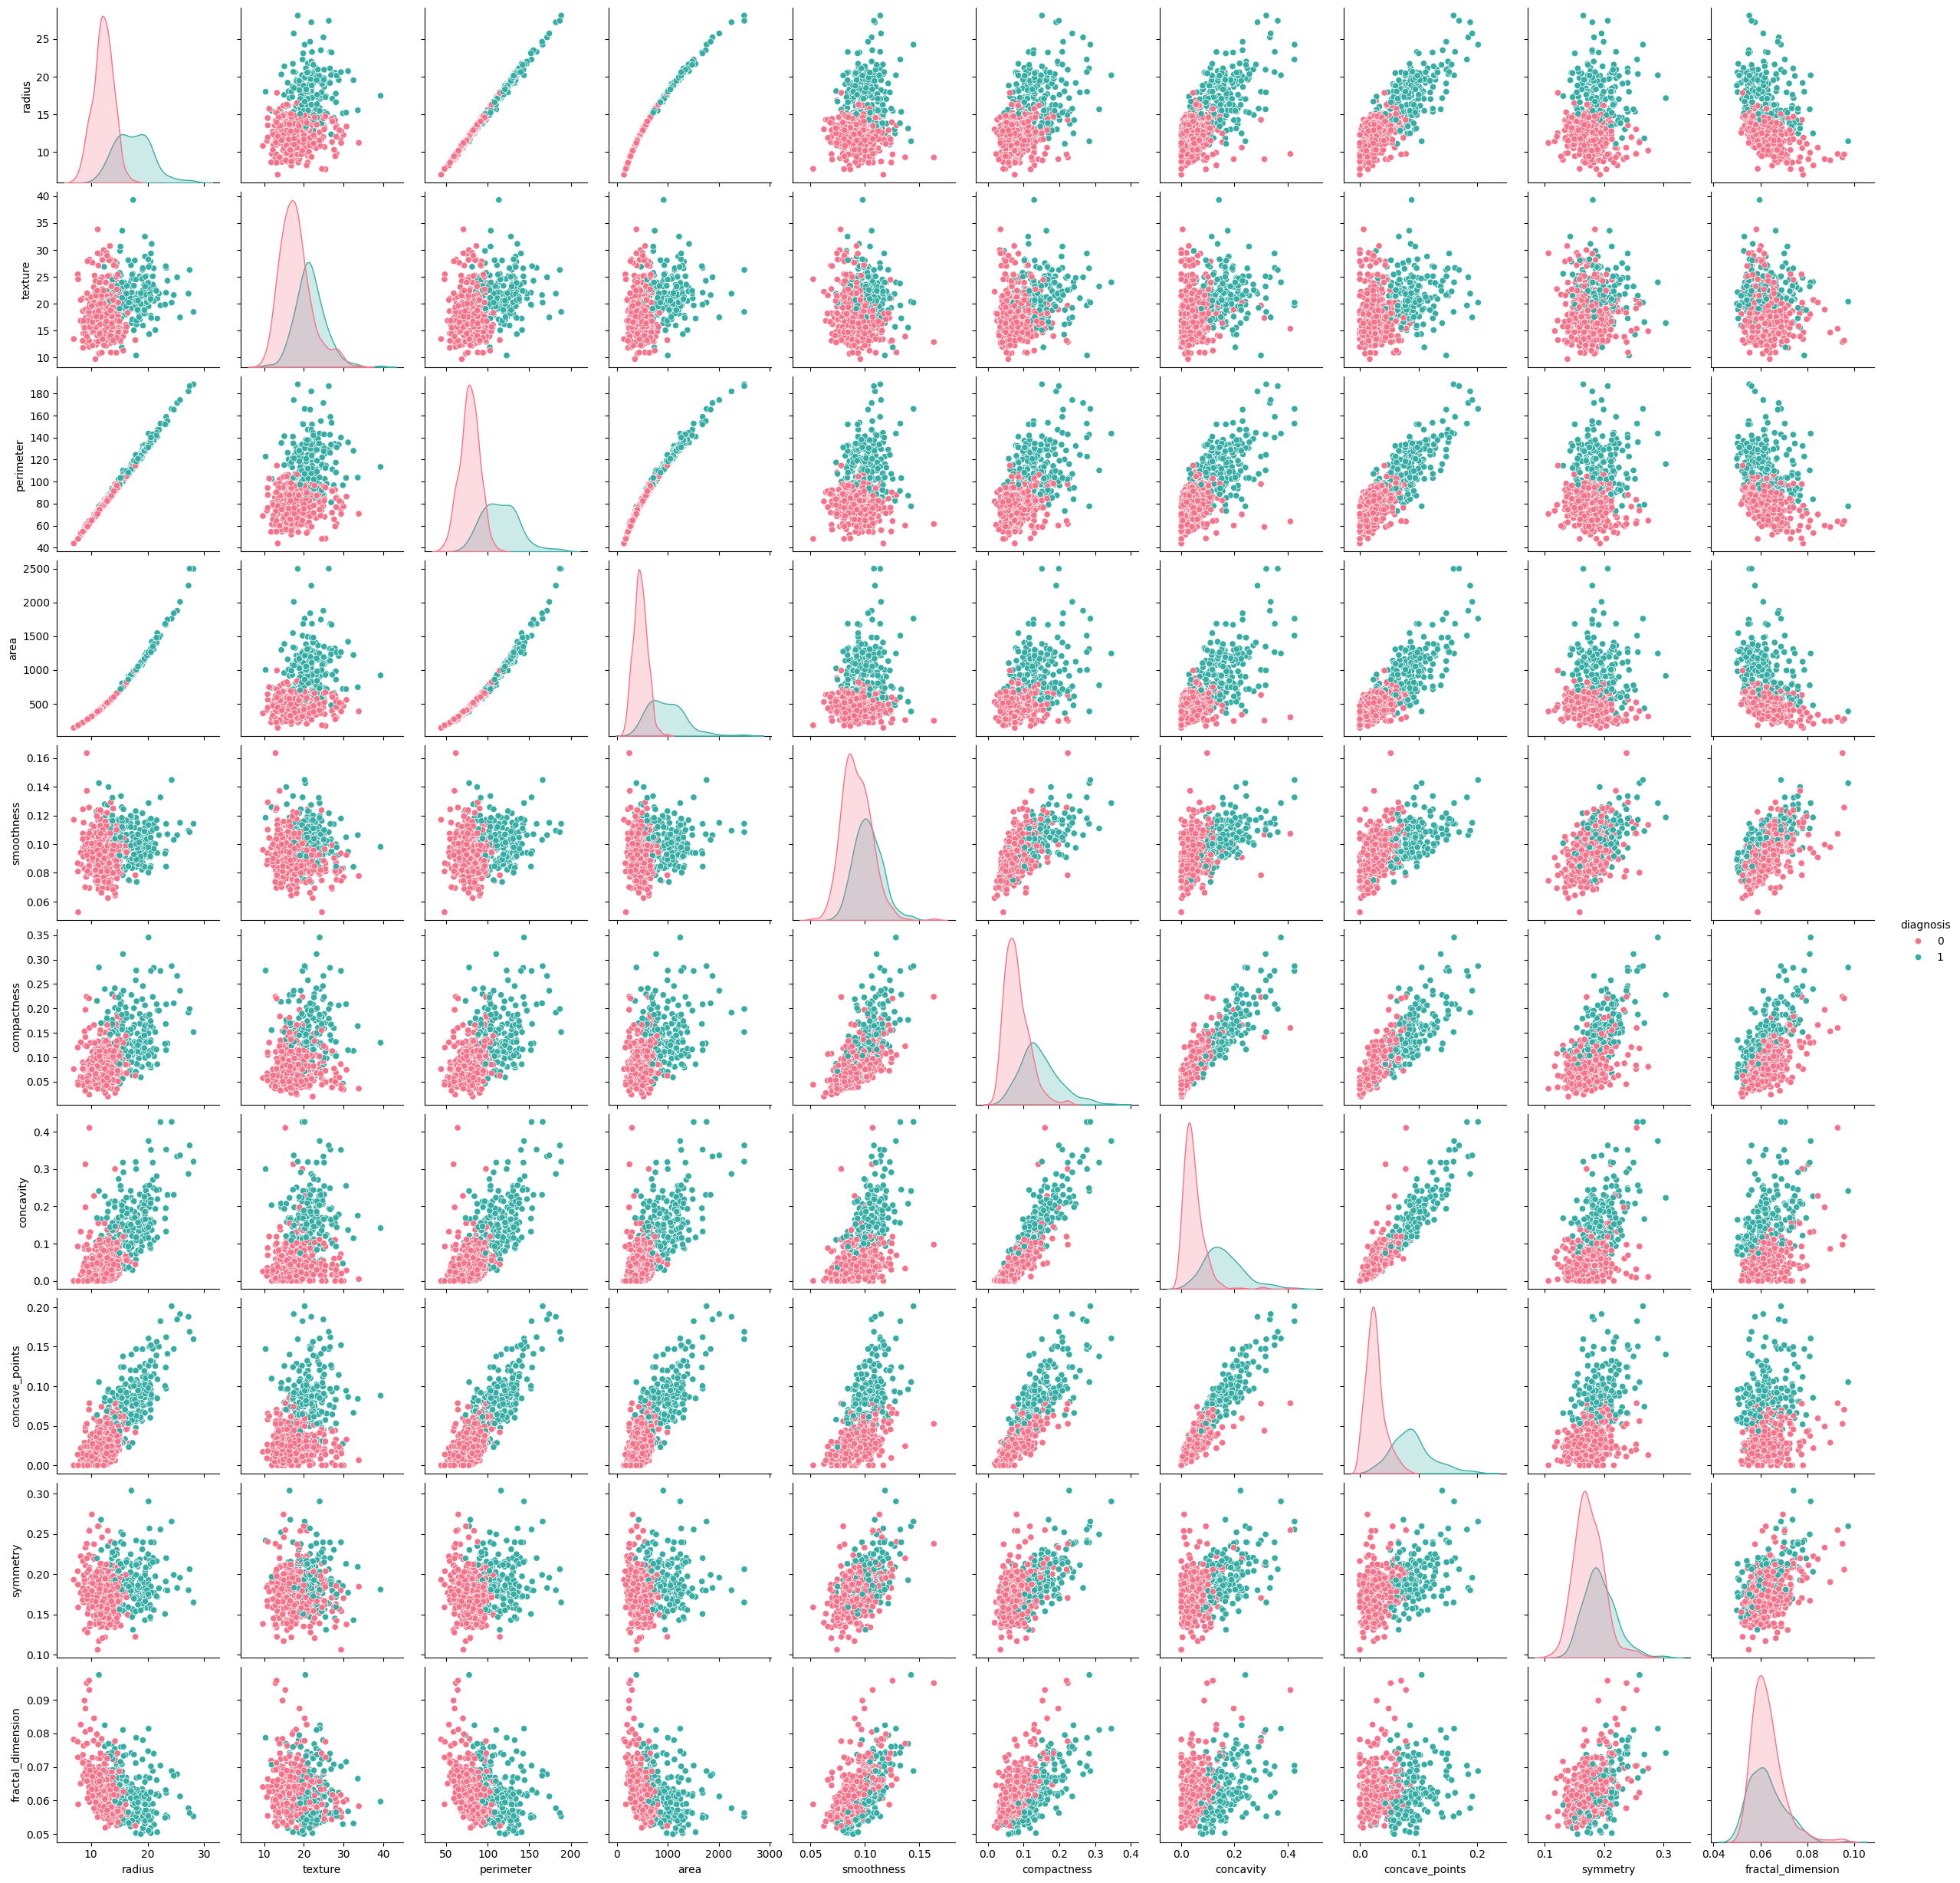

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('wdbc.csv')

# Replacing 'M' with 1 and 'B' with 0 in the 'diagnosis' column
df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})
df.columns = [col.rstrip('1') for col in df.columns]

# Move the 'Diagnosis' column to the last position and remove the 'ID' column
cols = list(df.columns)
cols.remove('Diagnosis')
cols.remove('ID')
cols = cols[:10]
df = df[cols + ['Diagnosis']]

# Standardize column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Print column names to verify
df.info()

df.describe()



<ipython-input-2-3566a70f9f3b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diagnosis'], palette=custom_palette)


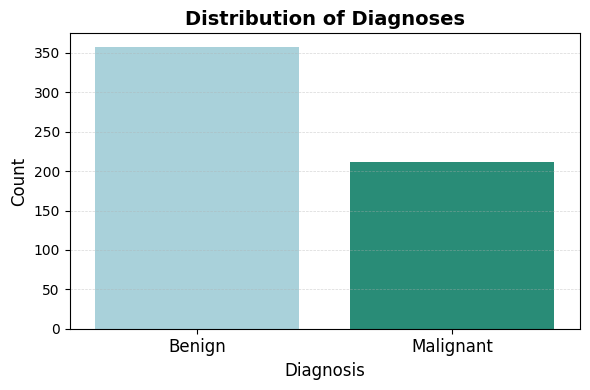

In [ ]:
# 1. Class Distribution with smooth and distinct colors
plt.figure(figsize=(6, 4))

# Define distinct smooth colors for classes
custom_palette = ["#A1D6E2", "#199C80"]  # Light blue for Benign, Soft green for Malignant

sns.countplot(x=df['diagnosis'], palette=custom_palette)
plt.title('Distribution of Diagnoses', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Benign', 'Malignant'], fontsize=12)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add subtle gridlines
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()


diagnosis            1.000000
concave_points       0.776614
perimeter            0.742636
radius               0.730029
area                 0.708984
concavity            0.696360
compactness          0.596534
texture              0.415185
smoothness           0.358560
symmetry             0.330499
fractal_dimension   -0.012838
Name: diagnosis, dtype: float64


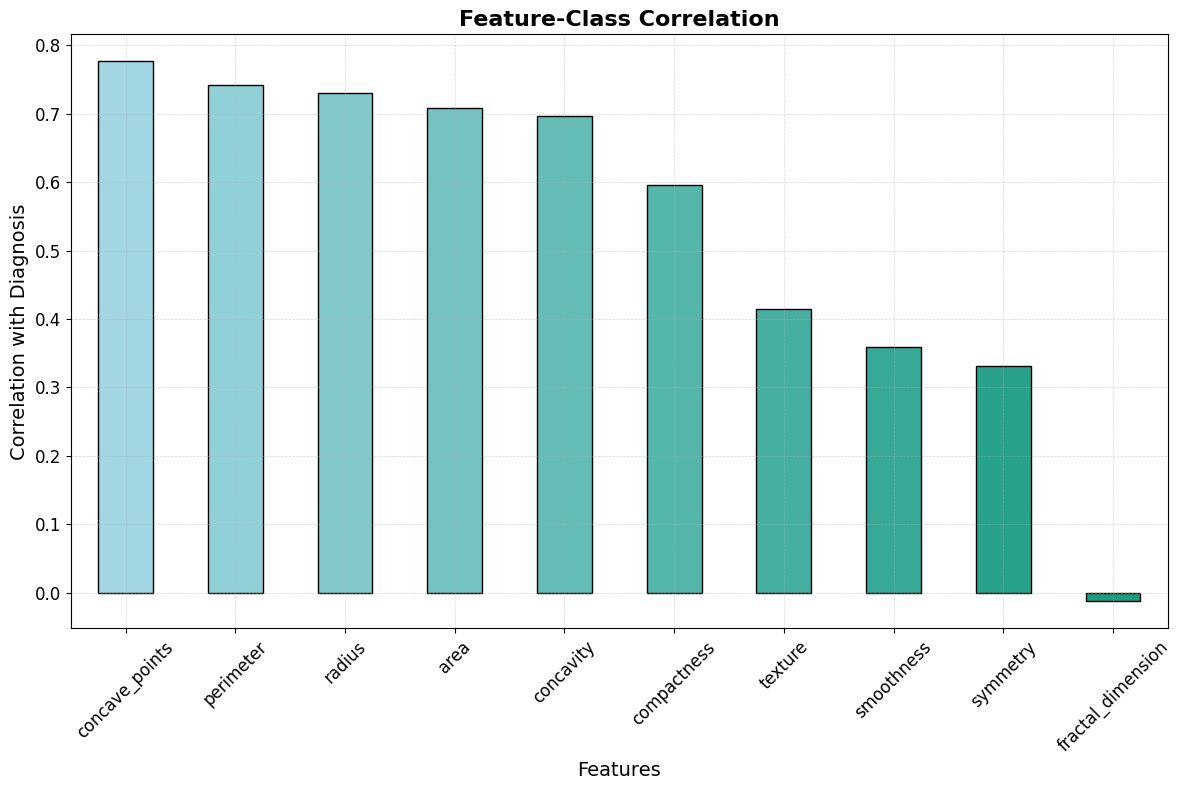

In [ ]:
# Calculate correlation of all features with the target class
correlation_with_class = df.corr()['diagnosis'].sort_values(ascending=False)

# Display the top correlations
print(correlation_with_class)

# Visualize feature-class correlations with enhanced aesthetics
import numpy as np

plt.figure(figsize=(12, 8))

# Create a custom colormap transitioning between two smooth colors (e.g., light blue to soft green)
from matplotlib.colors import LinearSegmentedColormap
custom_palette = LinearSegmentedColormap.from_list("custom", ["#A1D6E2", "#199C80"], N=len(correlation_with_class.drop('diagnosis')))

# Generate color values from the custom palette
colors = [custom_palette(i / len(correlation_with_class.drop('diagnosis'))) for i in range(len(correlation_with_class.drop('diagnosis')))]

# Plot the bar chart
correlation_with_class.drop('diagnosis').plot(kind='bar', color=colors, edgecolor='black')

plt.title('Feature-Class Correlation', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation with Diagnosis', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Soften gridlines to match the smooth theme
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()


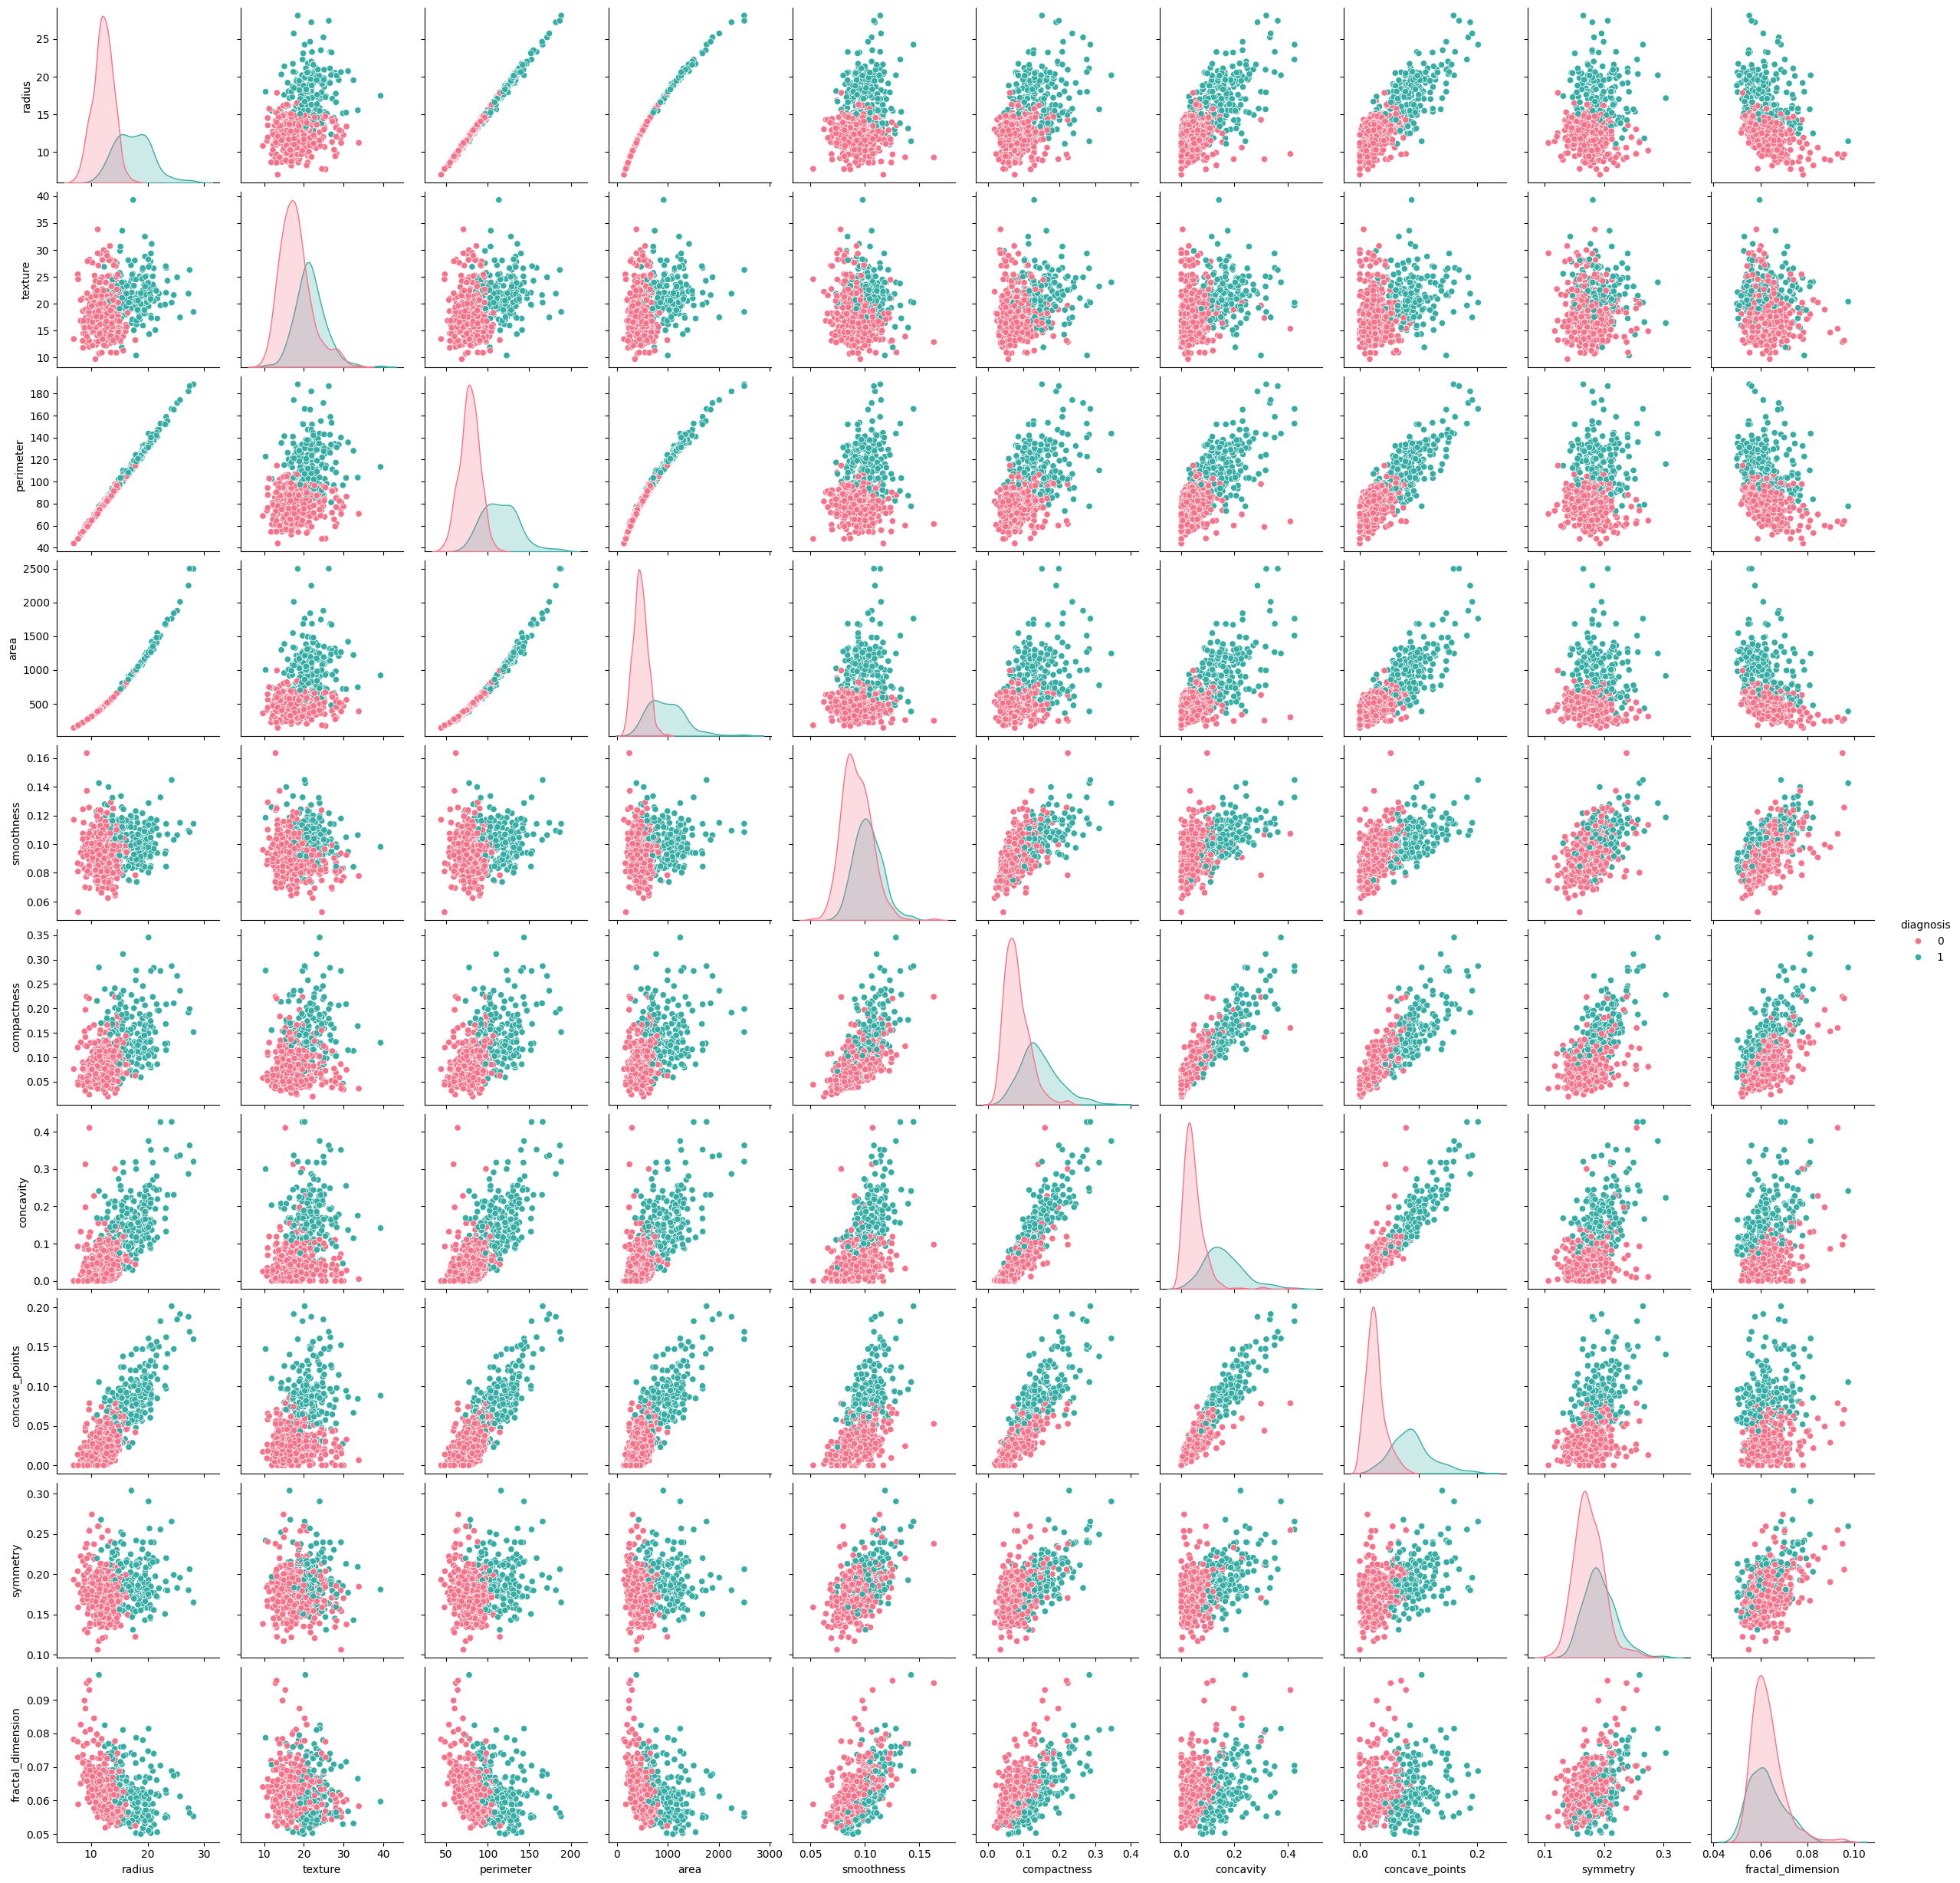

In [ ]:
sns.pairplot(df, hue='diagnosis', palette='husl', diag_kind='kde')
plt.show()

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
       'diagnosis'],
      dtype='object')


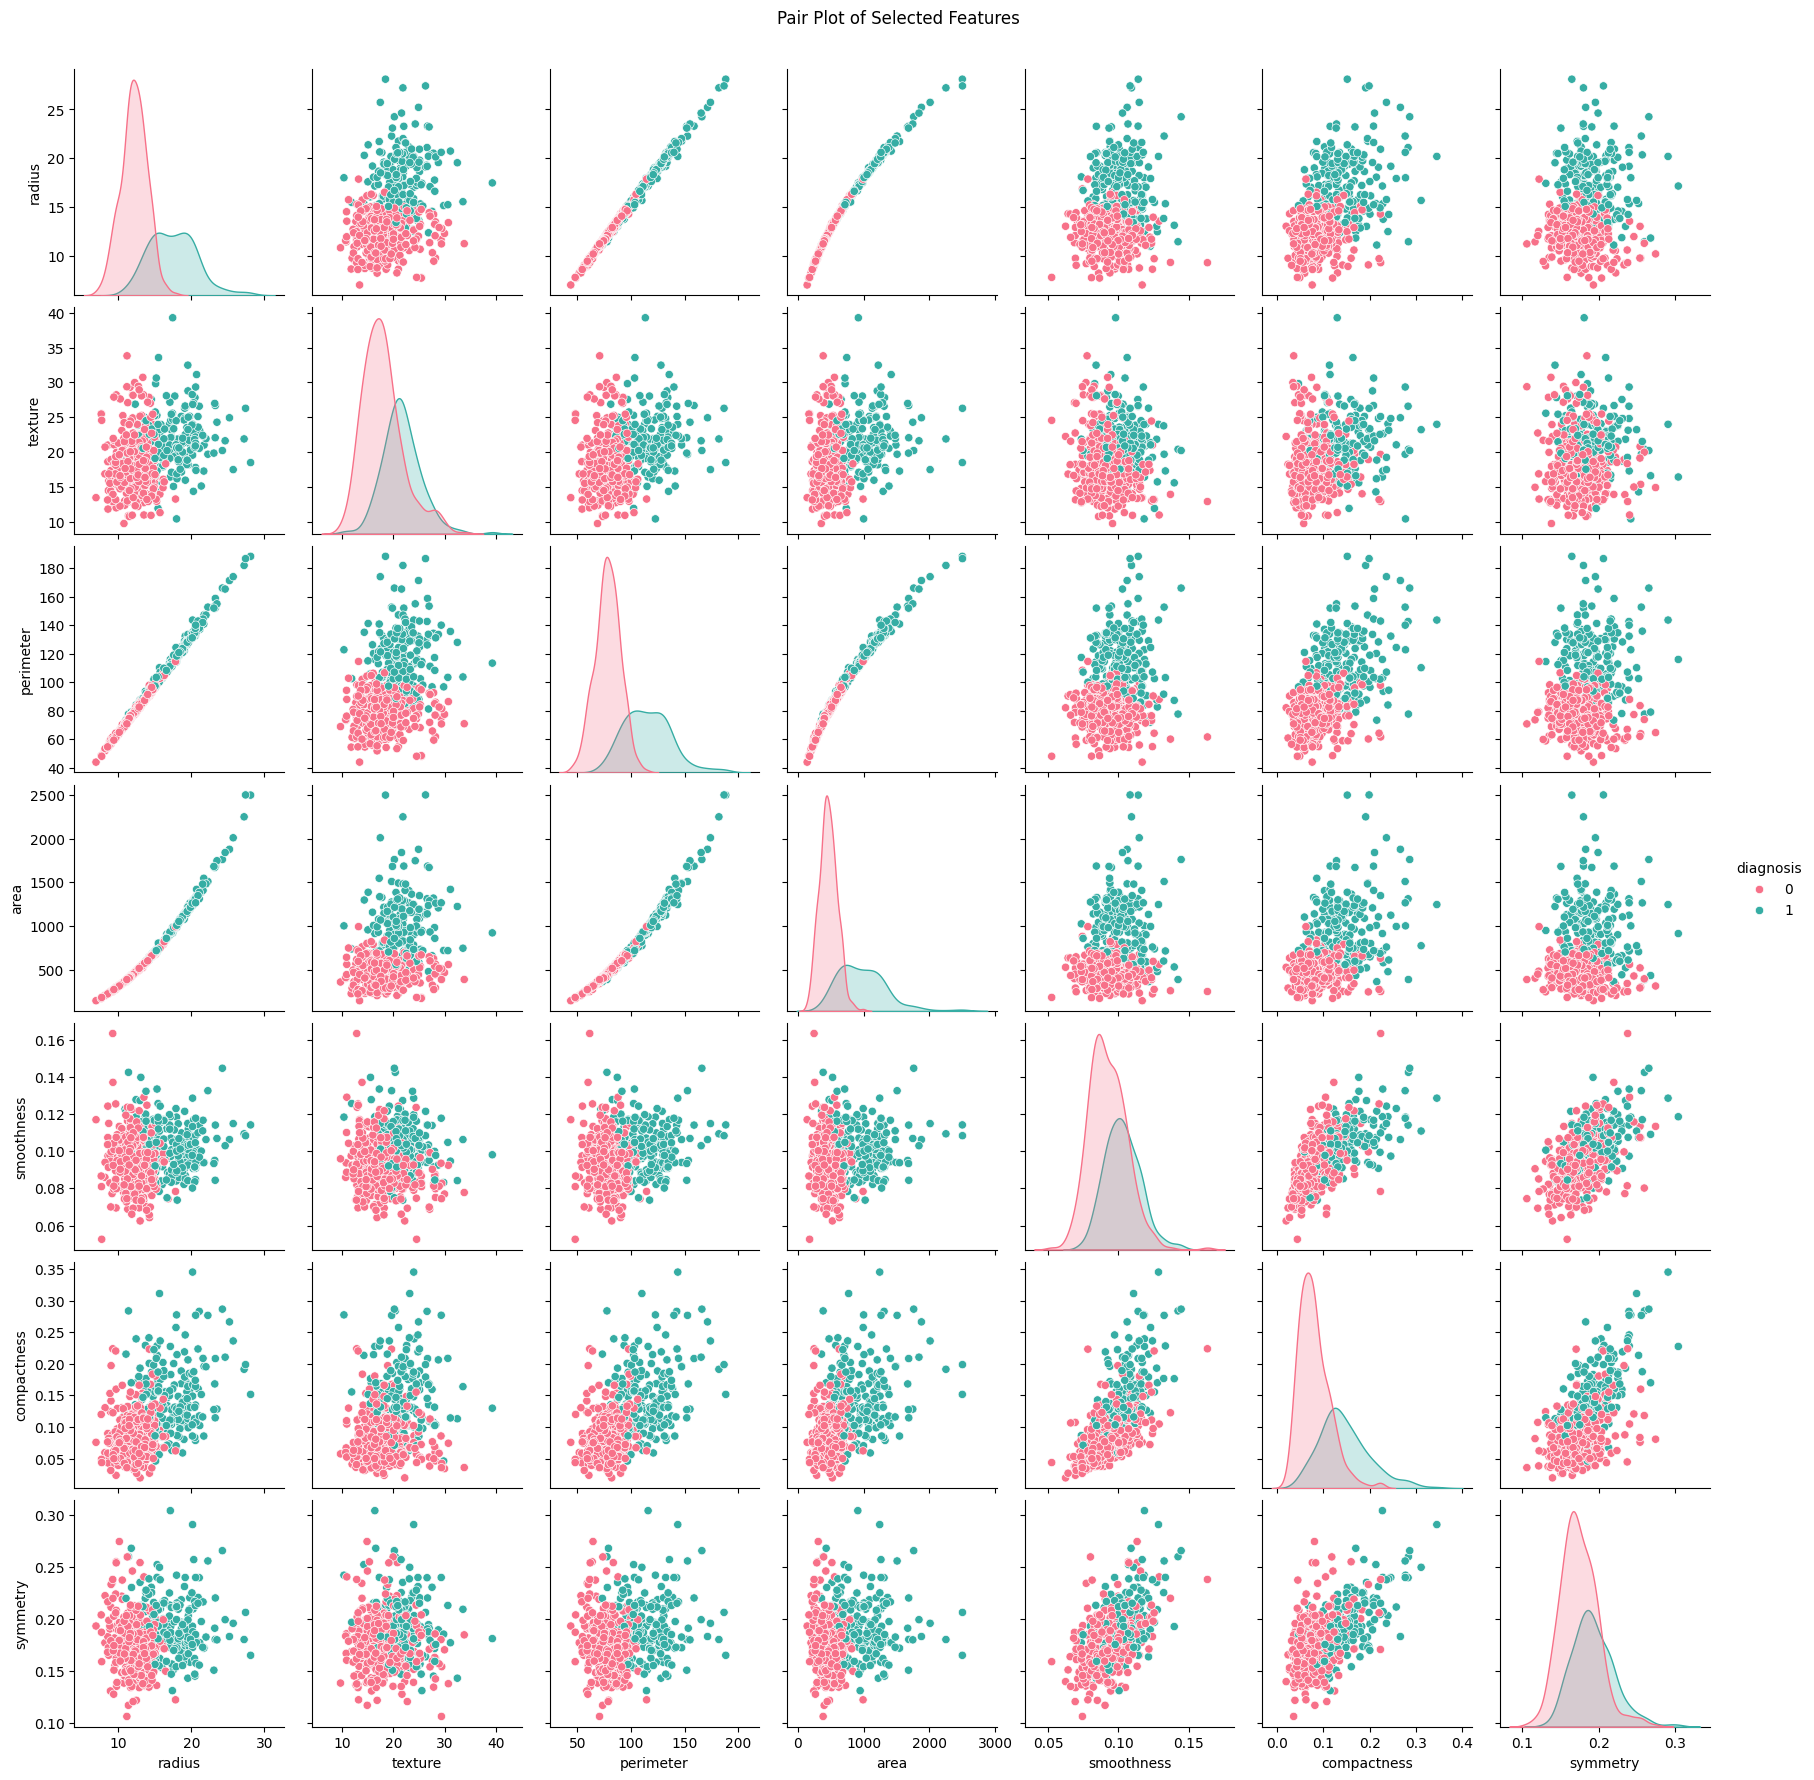

In [ ]:
# Print column names to verify
print(df.columns)

# Correct the feature selection if needed
selected_features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry']  # Adjust these names as per the dataset

# Check if columns exist in the dataframe before using them
missing_features = [feature for feature in selected_features if feature not in df.columns]
if missing_features:
    raise ValueError(f"Missing features in the dataset: {missing_features}")

sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

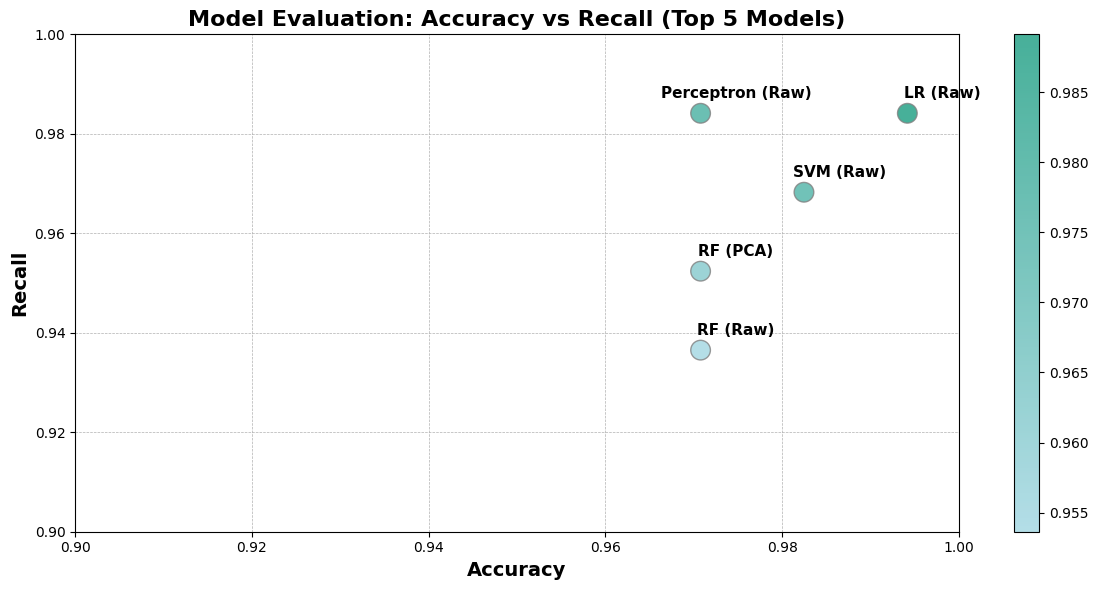

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define the results for the top 5 models from the project
best_results = {
    'LR (Raw)': {'accuracy': 0.994152, 'recall': 0.984127},
    'SVM (Raw)': {'accuracy': 0.982456, 'recall': 0.968254},
    'RF (Raw)': {'accuracy': 0.970760, 'recall': 0.936508},
    'Perceptron (Raw)': {'accuracy': 0.970760, 'recall': 0.984127},
    'RF (PCA)': {'accuracy': 0.970760, 'recall': 0.952381}
}

# Extract model names, accuracies, and recalls
models = list(best_results.keys())
accuracies = [best_results[model]['accuracy'] for model in models]
recalls = [best_results[model]['recall'] for model in models]

# Calculate a combined score (e.g., average of accuracy and recall) to determine color intensity
combined_scores = np.array([0.5 * (acc + rec) for acc, rec in zip(accuracies, recalls)])

# Create a custom colormap from light blue to soft green
colors = ["#A1D6E2", "#199C80"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("CustomGradient", colors)

# Create the scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(accuracies, recalls, c=combined_scores, cmap=custom_cmap, s=200, edgecolor='gray', alpha=0.8)

# Annotate points with model names
for i, model in enumerate(models):
    x_offset = 0.004 if accuracies[i] > 0.92 else 0.01  # Adjust horizontal position dynamically
    y_offset = 0.003  # Slight vertical offset
    plt.text(accuracies[i] + x_offset, recalls[i] + y_offset, model, fontsize=11, fontweight='bold', color='black', ha='center')

# Set plot labels and title
plt.xlabel('Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Recall', fontsize=14, fontweight='bold')
plt.title('Model Evaluation: Accuracy vs Recall (Top 5 Models)', fontsize=16, fontweight='bold', color='black')

# Add gridlines and limits
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)
plt.xlim(0.90, 1.0)
plt.ylim(0.90, 1.0)

# Add a colorbar to show combined scores
cbar = plt.colorbar(scatter)

# Adjust layout to ensure proper spacing for annotations
plt.tight_layout()
plt.show()


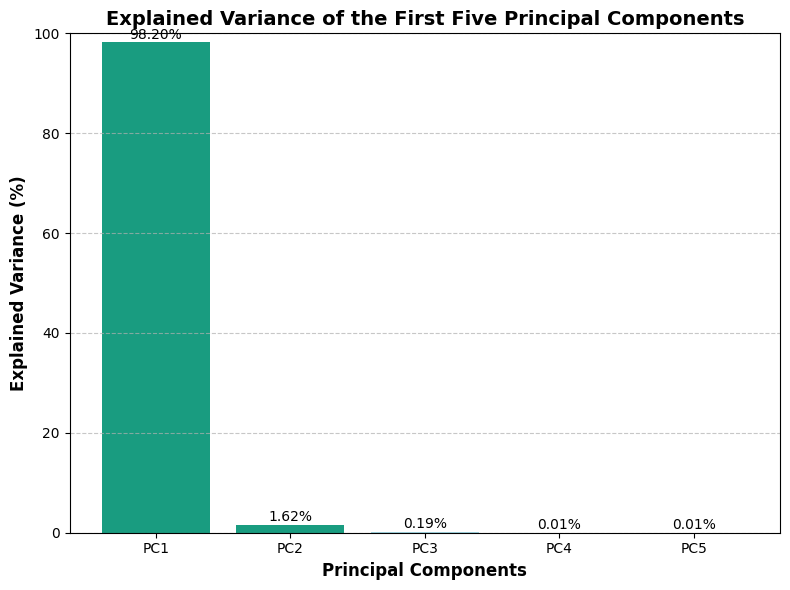

In [ ]:
import matplotlib.pyplot as plt

# Data for the plot
components = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
explained_variance = [98.20, 1.62, 0.19, 0.01, 0.01]

# Define colors
colors = ["#A1D6E2", "#199C80"]

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(components, explained_variance, color=[colors[0] if i > 1 else colors[1] for i in range(len(components))])

# Add values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{bar.get_height():.2f}%', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.ylim(0, 100)
plt.xlabel('Principal Components', fontsize=12, weight='bold')
plt.ylabel('Explained Variance (%)', fontsize=12, weight='bold')
plt.title('Explained Variance of the First Five Principal Components', fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save or show the plot
plt.tight_layout()
plt.savefig("explained_variance_pca.png", dpi=300)
plt.show()
